<a href="https://colab.research.google.com/github/ehsankarami1358/ehsan/blob/main/Random_farest_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [173]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv'

In [174]:
col_names=['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']

In [175]:
df=pd.read_csv(url,names=col_names,header=None)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [176]:
df.shape

(48842, 15)

In [177]:
df.income=='<=50K'

,income
0,True
1,True
2,True
3,True
4,True
...,...
48837,True
48838,True
48839,True
48840,True


In [178]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [179]:
df['income']=df['income'].apply(lambda x: x.strip())
df['income']

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K
48838,<=50K
48839,<=50K
48840,<=50K


In [180]:
df['income']=np.where(df['income']=='<=50K',0,1)
df['income']

,income
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


In [181]:
col_2=['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for col in col_2:
  df[col]=lb.fit_transform(df[col])


In [182]:
X=df.drop('income',axis=1)
y=df['income']

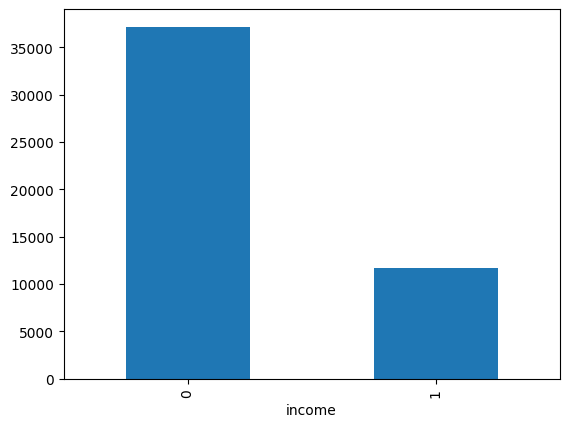

In [183]:
y_value_count=y.value_counts()
y_value_count.plot(kind='bar')
plt.show()

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rfc=RandomForestClassifier( n_estimators=200,max_depth=6)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=200)

In [207]:
y_pred=rfc.predict(X_test)

In [208]:
cm=confusion_matrix(y_test,y_pred)

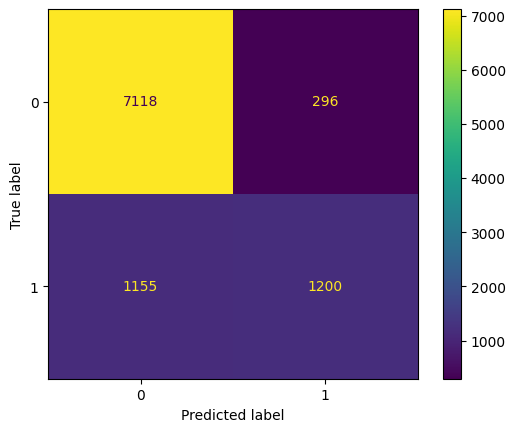

In [209]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [210]:
accuracy_score(y_test,y_pred)

0.8514689323369843

In [211]:
f1_score(y_test,y_pred)

0.6232147494157362

In [212]:
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
print("XGBoost version:", xgb.__version__)
print("Scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.3
Scikit-learn version: 1.6.1


In [205]:
#xgbc=XGBClassifier()
#xgbc.fit(X_train,y_train)